<hr style="border: solid 3px blue;">

# Introduction

![](https://upload.wikimedia.org/wikipedia/commons/9/91/Botella_i_copa_de_vi_Maci%C3%A0_Batle.jpg)

Picture Credit: https://upload.wikimedia.org

**In this notebook, our team will use linear regression model to analysis this dataset**

Before we get started, let's take a quick look at datasets.

**The objective of the dataset**

> This dataset is related to white variants of the Portuguese "Vinho Verde" wine, from north of Portugal. The objective of this dataset is to predict quality of a sample of white wine, base on 11 factors included in this dataset. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. 

**The Portuguese "Vinho Verde" white wine dataset consists of:**

* Fixed acidity: Consisting of non-volatile tartaric and malic acids, a crucial determinant of a wine's taste
* Volatile acidity: The amount of acetic acid present
* Citric acid: One of the acids, can be added to wines to increase acidity and enhance freshness
* Residual sugar: The sugar content in wine remaining after fermentation has stopped
* Chlorides: Contribute to the overall salinity and can influence the flavor profile of wine
* Free sulfur dioxide: The portion of sulfur dioxide that is not bound to other compounds in the wine
* Total sulfur dioxide: It represents the total amount of SO2 used during winemaking for its antioxidant and antimicrobial properties
* Density: Density in wine is a measure of its mass per unit volume and is influenced by factors 
* pH: Measures its level of acidity or basicity, with lower pH values indicating higher acidity. 
* Sulphates: The form of potassium sulphate, are derived from sulfur dioxide (SO2), which is commonly added during winemaking as a preservative and antioxidant
* Alcohol: The amount of alcohol in wine
* Quality: Score between 0 and 10

# Load Libraries

In [1]:

# 1
# In this part we import the necessary csv files and some helpful tools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

df = pd.read_csv("winequality-white.csv", sep =';')



# Display the data

In [2]:
# 2
# In the second part we briefly display the data

In [3]:
df.shape

(4898, 12)

In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:

# According to the data content, we can find that the data has approximately 5000 rows and 12 columns.
# All made of numbers. This saves us from converting the strings in the data into numbers (because there is no string type data)


In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<span style="color:Blue"> **Observation:**
* For the data Residual sugar, Free sulfur dioxide and Total sulfur dioxide, we find huge difference between their minimum and maximum value.
* So the standard deviation of those three data is relatively high
* Only Citric acid have a zero in mimimum value

# Checking missing values

In [7]:
# 3
# This part is data cleaning

In [8]:
df.isnull().values.any()

False

In [9]:

# This shows that the data are not missing and do not need to be supplemented.


# Distribution patterns of data

In [10]:
# 4
#  This part is a more detailed display of the data, mainly focusing on the distribution patterns of the data.

## Histogram of data

<Axes: ylabel='Frequency'>

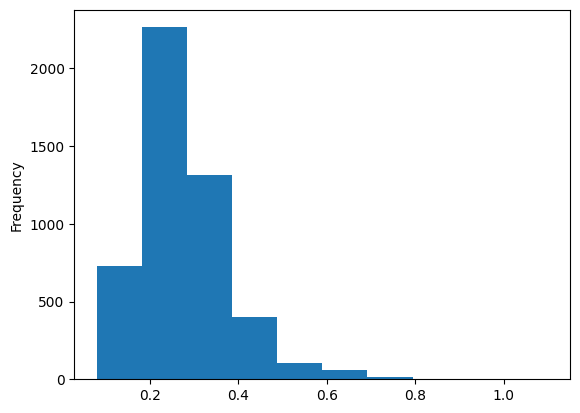

In [11]:
df['volatile acidity'].plot(kind='hist')

**The most volatile acidity is around 0.2-0.3, appears in over 2500 wine samples. Second highest is between 0.3-0.4, observe in over 1250 samples.**

<Axes: ylabel='Frequency'>

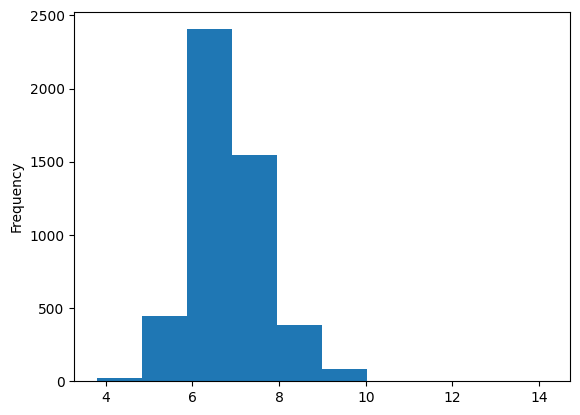

In [12]:
df['fixed acidity'].plot(kind='hist')

**For fixed acidity, highest frequency is in between 6-7, close to 2500. Second highest is between 7-8, which have around 1500 frequncy.**

<Axes: ylabel='Frequency'>

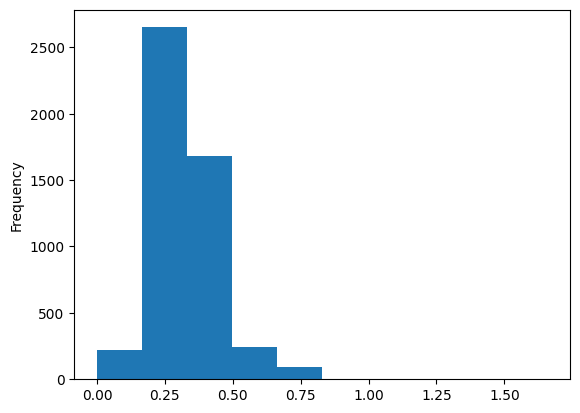

In [13]:
df['citric acid'].plot(kind='hist')

**For citric acid, number between 0.2-0.3 appear in most samples, over 2500. The second highest is between 0.3-0.5, over 1500 samples.**

<Axes: ylabel='Frequency'>

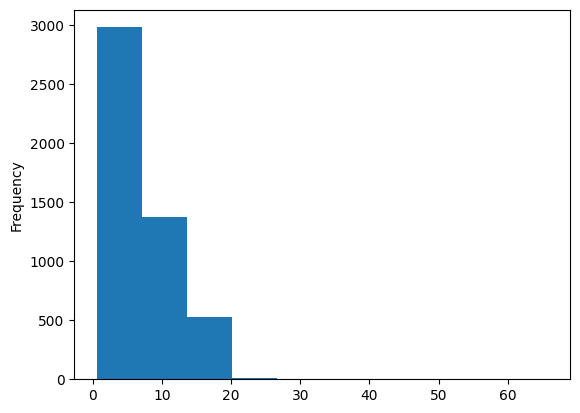

In [14]:
df['residual sugar'].plot(kind='hist')

**For residual sugar data, around 3000 samples are below 8, which is the most. The second highest and the third highest are 8-12 and 12-20 respectively, sample number are around 1400 and 500.**

<Axes: ylabel='Frequency'>

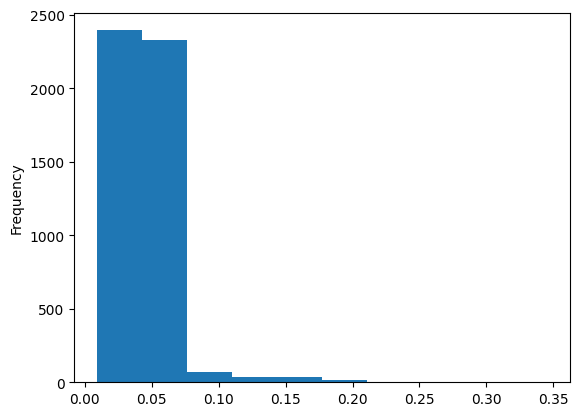

In [15]:
df['chlorides'].plot(kind='hist')

**For chlorides in wine samples, about 90% samples are in between 0.2-0.7, around 4500. Others are over 0.7, less than 250 samples in total.**

<Axes: ylabel='Frequency'>

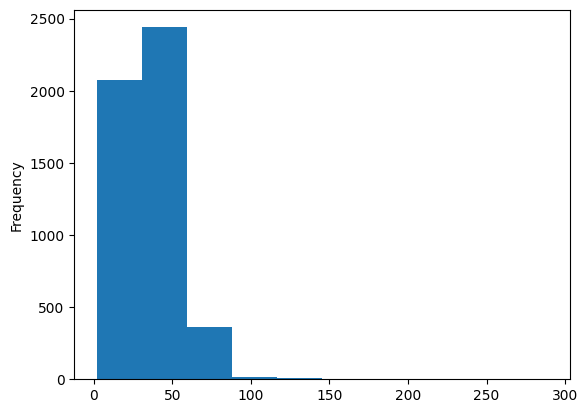

In [16]:
df['free sulfur dioxide'].plot(kind='hist')

**For free sulfur dioxide, around 4500 samples have around 0-51, samples have over 51 is less than 500 in total.**

<Axes: ylabel='Frequency'>

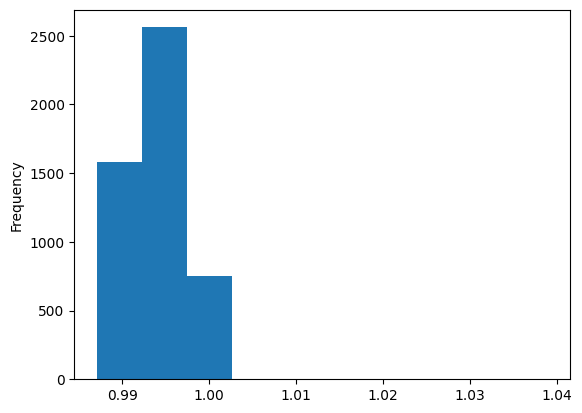

In [17]:
df['density'].plot(kind='hist')


**Over 2500 samples have density between 0.993-0.998, second most is between 0.985-0.993, which have over 1500 samples.**

<Axes: ylabel='Frequency'>

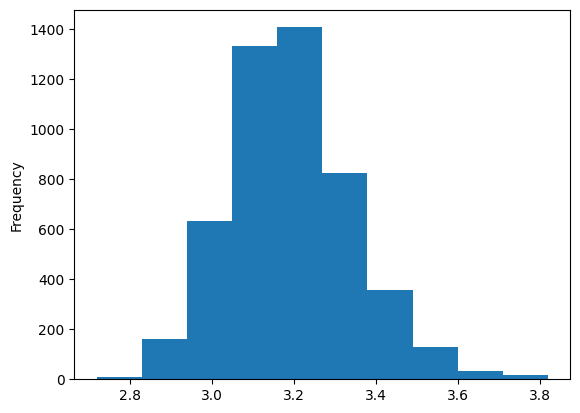

In [18]:
df['pH'].plot(kind='hist')

**For the most samples, pH value is around 3.1-3.3. The second most and the third most are 3.3-3.4 and 2.9-3.1 respectively.**

<Axes: ylabel='Frequency'>

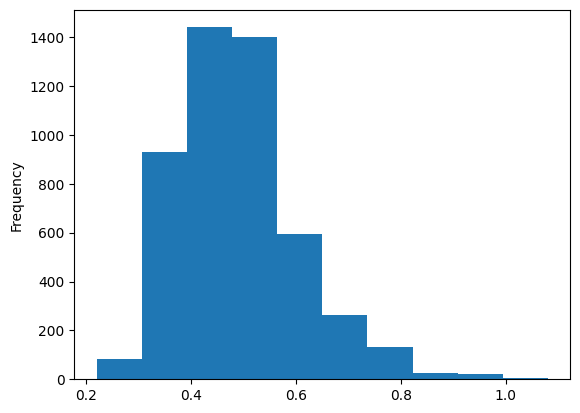

In [19]:
df['sulphates'].plot(kind='hist')

**Around 3000 samples have sulphates around 0.4-0.58, second most is between 0.3-0.4, which have around 900 samples.**

<Axes: ylabel='Frequency'>

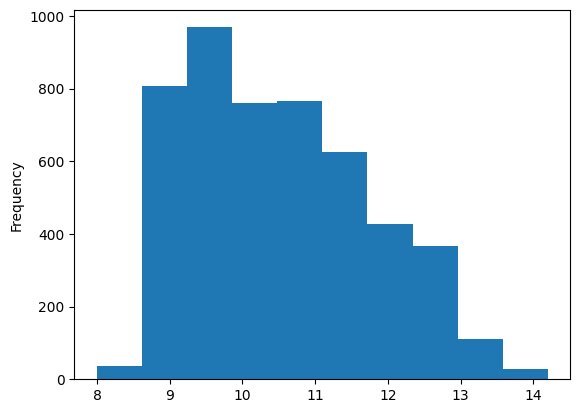

In [20]:
df['alcohol'].plot(kind='hist')

**Alcohol amound for samples is vary from 8 to over 14, most samples have alcohol between 8.5-13, both samples less than 8.5 or more than 13 are less than 200 in total.**

<Axes: ylabel='Frequency'>

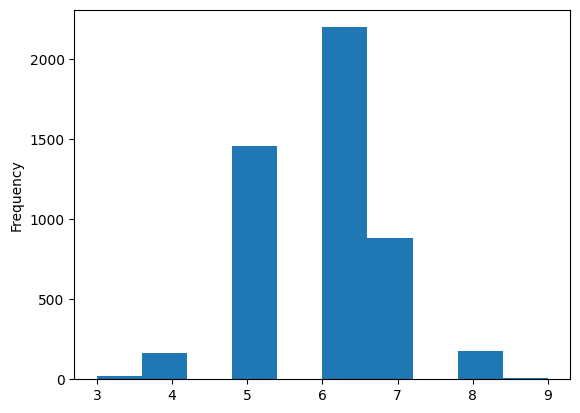

In [21]:
df['quality'].plot(kind='hist')

**Most samples score around average, between 5 to 7, very small number on quality less than 5 and higher than 7.**

<span style="color:Blue"> **Observation:**
* As can be seen from the histogram, most of the data presents a right-skewed distribution.

## Boxplot of data

<Axes: >

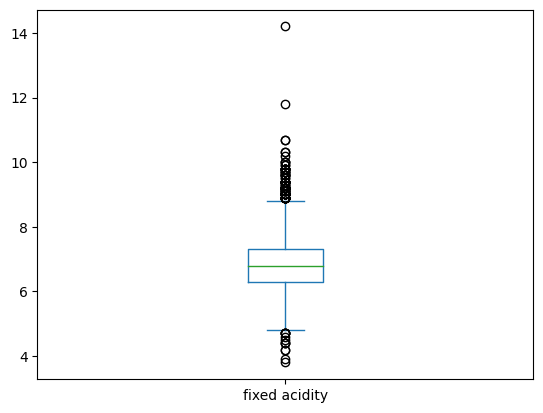

In [23]:
df['fixed acidity'].plot(kind='box')


<Axes: >

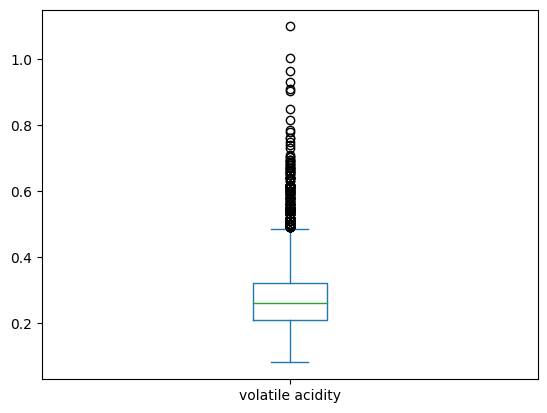

In [24]:
df['volatile acidity'].plot(kind='box')


<Axes: >

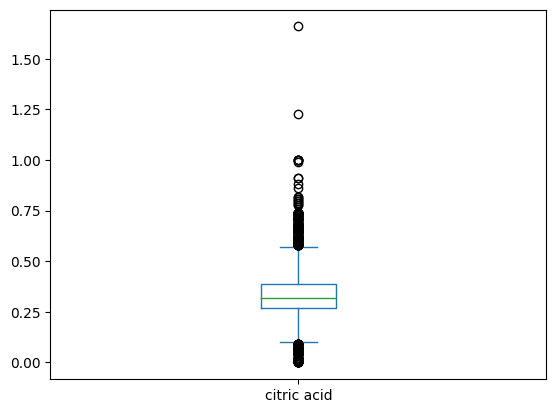

In [25]:
df['citric acid'].plot(kind='box')


<Axes: >

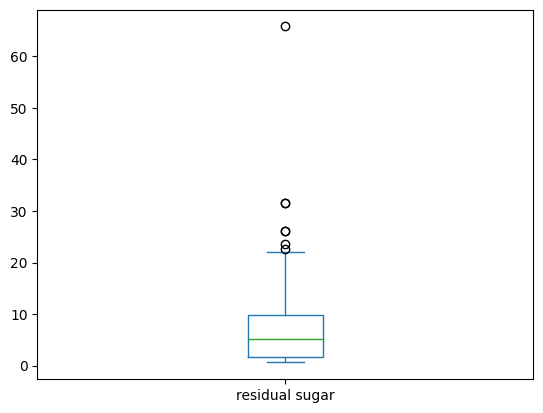

In [26]:
df['residual sugar'].plot(kind='box')


<Axes: >

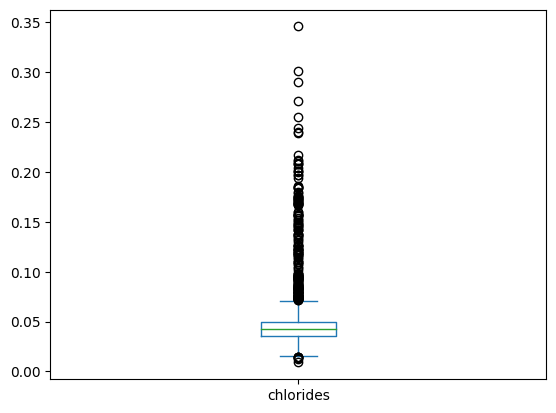

In [27]:
df['chlorides'].plot(kind='box')


<Axes: >

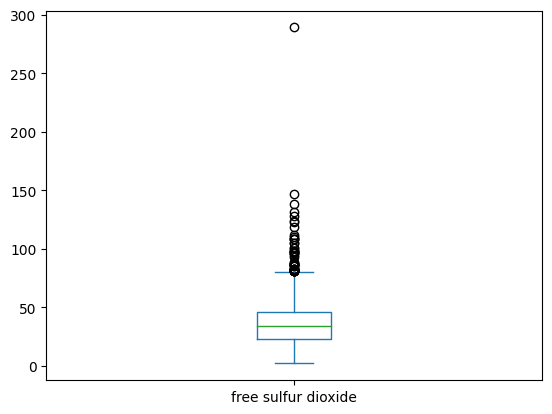

In [28]:
df['free sulfur dioxide'].plot(kind='box')


<Axes: >

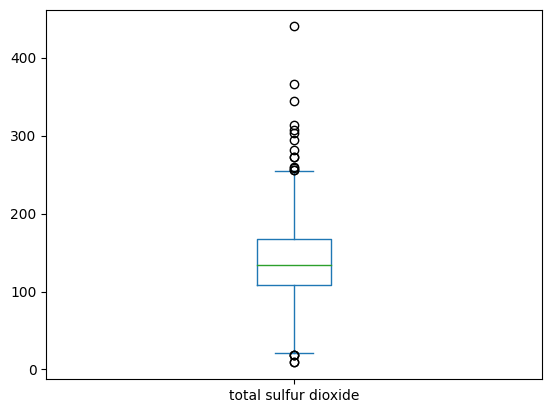

In [29]:
df['total sulfur dioxide'].plot(kind='box')


<Axes: >

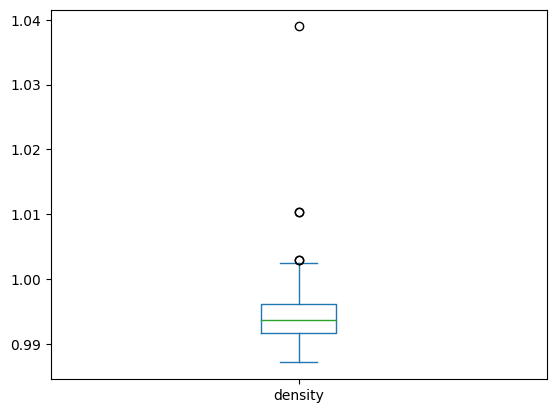

In [30]:
df['density'].plot(kind='box')

<Axes: >

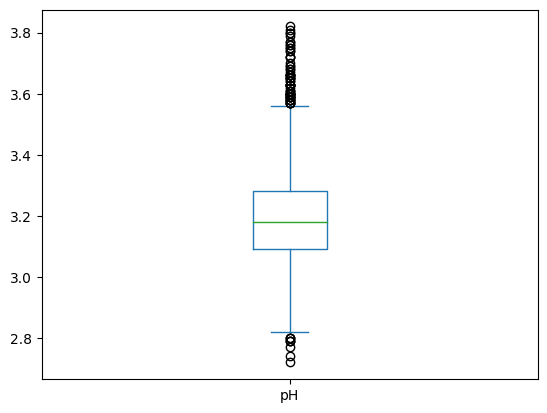

In [31]:
df['pH'].plot(kind='box')

<Axes: >

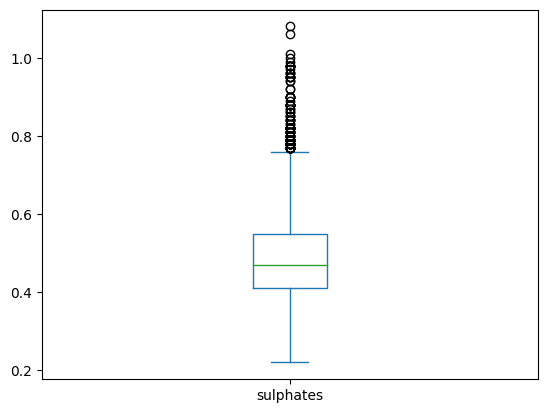

In [32]:
df['sulphates'].plot(kind='box')

<Axes: >

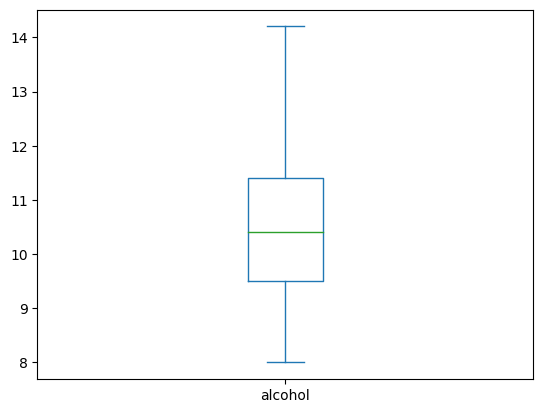

In [33]:
df['alcohol'].plot(kind='box')

<Axes: >

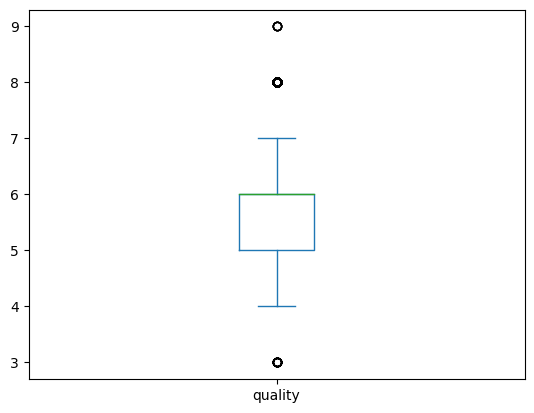

In [34]:
df['quality'].plot(kind='box')

<span style="color:Blue"> **Summary:**
* From the boxplot we can see that the data contains some extreme values. Then we need to consider whether to exclude these extreme values during the data cleaning process

* In fact, there are two possibilities for "outliers" obtained by relying solely on box plots, namely:
 1. Nature or characteristics of data
 2. Outliers caused by statistical errors


* Upon closer inspection we find that the outliers in this data set are within the bounds of common sense. It’s entirely possible to assume that these outliers simply mean that the wine has unique properties, rather than statistical errors.

*** Therefore, we decided to retain these outliers in order to obtain better training results.**

## Heat map of data

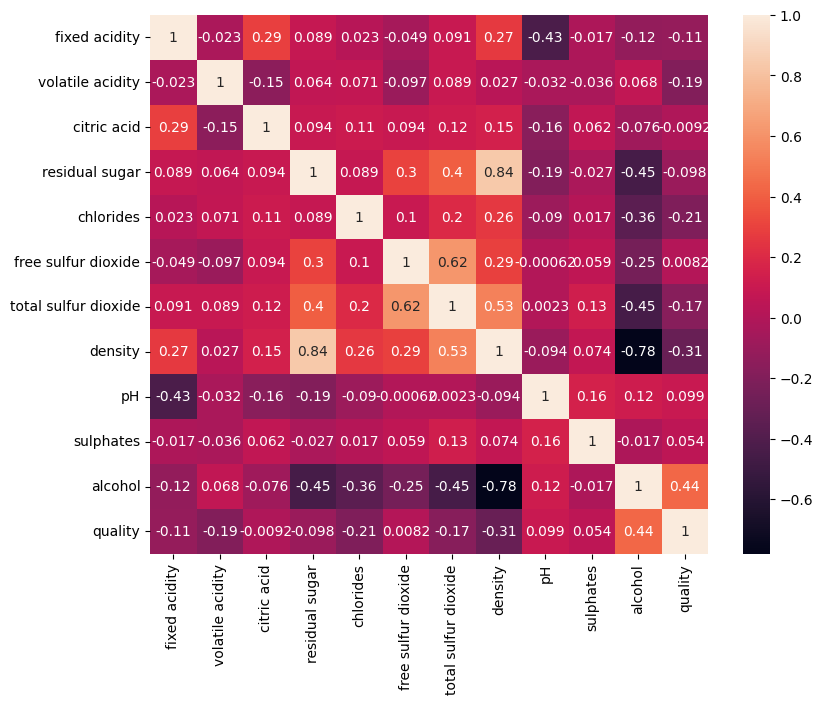

In [36]:
import matplotlib.pyplot as plt
Var_Corr = df[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

# Due to the complexity of the data, we didn't get much information from the heat map.

<span style="color:Blue"> **Observation:**
* Highest correclation with target value Quality is Alcohol, which achieve 0.44.
* Residual sugar and Density have the highest positive relationship in the map, which is 0.84.
* Second highest are Total sulfur dioxide and Free sulfur dioxide, which is 0.62.
* Density is positively correlated with residual sugar, and density is negatively correlated with alchol

# Split data and train model

In [37]:
# 5
# In this part we will split the data and train our model

In [38]:
target=df['quality'].copy()
target.head

<bound method NDFrame.head of 0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

In [39]:
df.drop(columns=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [40]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=123)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

<Axes: ylabel='Frequency'>

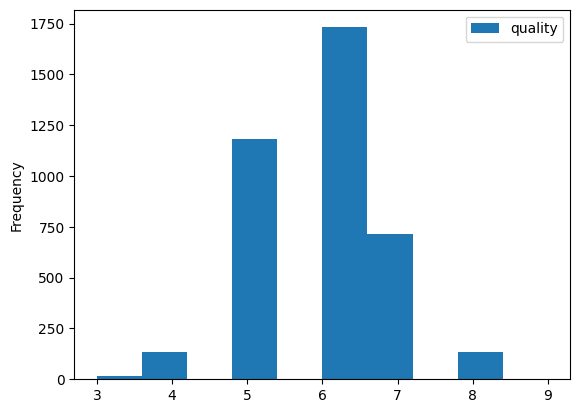

In [41]:
y_train.plot(kind='hist')

<Axes: ylabel='Frequency'>

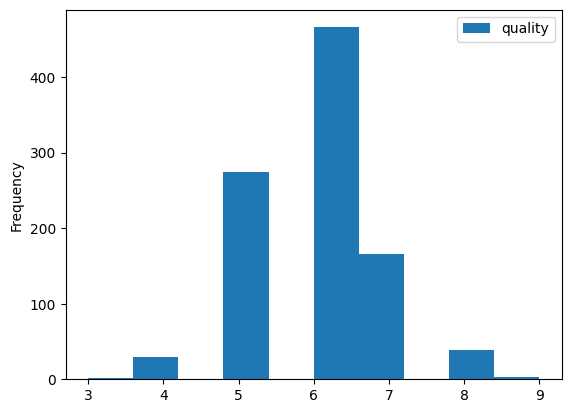

In [42]:
y_test.plot(kind='hist')

* They follow similar distribution. This shows that there are no surprises in our data split

In [43]:
# As explained in the report, we will use a linear regression model

from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [59]:
from sklearn import metrics  
y_pred = (linear_model.predict(X_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('R2 Error:', metrics.r2_score(y_test, y_pred))


# We observed a small Mean Squared Error and a nearly perfect R2.
# This shows that our model performs well. we are satisfied with this

Mean Squared Error: 1.037794818424683e-30
R2 Error: 1.0


<span style="color:Blue"> **Observation:**
* Observed a small Mean Squared Error, means our model doing great on fit the data
* Get a 1 value in R2, means independend variables X nearly perfect explains the dependent varible y.

In [45]:

k=0

for i in range(len(y_test)):
    if y_test.values[i]==y_pred[i].round(0).astype(int):
        k=k+1
    else:
        print(y_test.values[i])
        print(y_pred[i].astype(int))

  
   
k

980

**It can be found that after rounding, our prediction data and test data are exactly the same, which shows that our model is very accurate.**

# Train and test the model after remove outliers

In [49]:
# Use scale function to remove outliers
X_train_SS = preprocessing.scale(X_train)
X_test_SS = preprocessing.scale(X_test)

# Train new model
linear_model_2 = LinearRegression()  
linear_model_2.fit(X_train_SS, y_train)
y_pred_SS = (linear_model_2.predict(X_test_SS)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SS))  
print('R2 Error:', metrics.r2_score(y_test, y_pred_SS))

Mean Squared Error: 0.0018516188387224573
R2 Error: 0.9975910752715564


<span style="color:Blue"> **Observation:**
* **Our model with outliers actully perform very well, with a low MSE and R2 close to 1. But we still want to see how will the model perform if we remove all the outliers of the dataset. Result as above, we get a higher MSE compare to the first model, although MSE of first model is relatively low. For the R2, it slightly decrease from the first model, but still very close to the perfect value 1.** 


<hr style="border: solid 3px blue;">

# Conclusion

**After compute model with and without outliers of dataset, we find tiny difference between two models. Both R2 Error are nearly perfect and have a small MSE. That means both model explain dependent varible well and fit the data well. We do not think outliers play an important role on training a accuracy model.**


## Reference
* The data used in this study comes from the website: https://archive.ics.uci.edu/dataset/186/wine+quality 